# **Análise Preditiva para Estúdio PProductions**

Neste projeto, atuarei como **cientista de dados consultor para o estúdio de Hollywood PProductions**. O meu objetivo é **realizar uma análise aprofundada** em um banco de dados de filmes de sucesso para **identificar os fatores que contribuem para uma alta performance de crítica e bilheteria**.

Ao final, o projeto não só responderá perguntas de negócio cruciais para o estúdio, mas também entregará um **modelo de machine learning capaz de prever a nota de um filme no IMDB com base em suas características**, servindo como uma ferramenta de apoio na tomada de decisão para futuras produções.

Irei seguir uma **pipeline de trabalho para garantir uma abordagem estruturada e organizada**:

1. **Definição do Problema de Negócio**

2. **Coleta e Visão Geral dos Dados**

4. **Análise Exploratória de Dados (EDA)**

3. **Divisão dos Dados em Treino e Teste**

5. **Modelagem e Pré-processamento dos Dados**

6. **Teste e Avaliação Final do Modelo**

7. **Conclusão e Interpretação dos Resultados**

8. **Entrega do Projeto (Deploy)**

Neste notebook, irei percorrer todas as etapas da pipeline. A primeira grande seção será dedicada à Análise Exploratória de Dados (EDA). O objetivo principal desta fase é descobrir insights e padrões nos dados que me permita entender as características de um filme de sucesso, ajudando a PProductions a tomar decisões mais informadas mesmo antes da construção do modelo preditivo.



---



## **1. Definição do Problema de Negócio**

1. **Contexto:**
A PProductions, um renomado estúdio de Hollywood, enfrenta um desafio constante e de alto risco: decidir qual filme produzir a seguir. A produção de um longa-metragem envolve investimentos na casa dos milhões de dólares, e o retorno financeiro não é garantido. O estúdio reconhece que, para tomar decisões de investimento mais seguras e responsáveis, é crucial substituir a intuição por uma abordagem baseada em dados. Eles precisam de uma análise detalhada do mercado cinematográfico histórico para entender o que faz um filme ser bem-sucedido.

1. **Métricas de Sucesso (KPIs) para um Filme:** Para medir o sucesso de um filme, focaremos em três métricas chave (KPIs): o Faturamento (Gross), que indica o sucesso comercial, a Nota IMDB (IMDB_Rating), que representa a aprovação do público, e o Meta_score, que reflete a aclamação da crítica. O objetivo da PProductions é equilibrar alta lucratividade com qualidade para fortalecer sua marca.

2. **Objetivo do Projeto:**
O propósito desta análise é entregar os seguintes resultados para a PProductions:

- Identificar os fatores (gênero, duração, elenco, diretor) que estão consistentemente associados ao sucesso financeiro (Faturamento) e de
público (Nota IMDB) de um filme, fazendo uma análise aprofundada e apresentando hipóteses inovadoras e criativas.

- Construir um modelo preditivo capaz de estimar com acurácia a futura nota IMDB de um filme com base em suas características iniciais.

- Oferecer uma recomendação estratégica, baseada nos dados, sobre o perfil de filme mais promissor para a próxima produção do estúdio, visando equilibrar o potencial de lucro e a qualidade.





## **2. Coleta e Visão Geral dos Dados**

In [3]:

# Manipulação, Análise de Dados e visualização
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as mticker
import plotly.express as px
# Config de visualização
%matplotlib inline

sns.set_style('whitegrid')
# Tamanho padronizado das figuras nos gráficos
plt.rcParams['figure.figsize'] = (10, 6)


# Filtrar warnings
import warnings
warnings.filterwarnings('ignore')


## **Carregamento e Entendendo um pouco dos dados**

Com as bibliotecas importadas, o próximo passo é carregar o dataset para um DataFrame do Pandas, que é a estrutura principal que usarei para trabalhar com os dados.



In [4]:
# Carregamento dos dados

# Definindo o caminho do arquivo a ser carregado
data_path = '/content/desafio_indicium_imdb.csv'

# Carregando o dataset e retirando coluna redundante
df = pd.read_csv(data_path, index_col=0)

In [5]:
# Verificando as primeiras linhas para um primeiro contato
df.head()

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


### **Dicionário de Dados:**

Para facilitar o entendimento de todas as variáveis com as quais vamos lidar, irei abaixo demonstrar um dicionário de dados que descreve cada uma das colunas.


- **Series_Title:** Nome do filme (Categórica Nominal).

- **Released_Year:** Ano de lançamento do filme (Numérica Discreta).

- **Certificate:** Classificação etária do filme (Categórica Ordinal).

- **Runtime:** Duração do filme em minutos (Numérica Contínua).

- **Genre:** Gênero ou gêneros do filme (Categórica Nominal).

- **IMDB_Rating:** Nota do filme no IMDB (de 1 a 10) (Numérica Contínua).

- **Overview:** Breve sinopse do filme (Texto).

- **Meta_score:** Nota da crítica especializada (de 1 a 100) (Numérica Contínua).

- **Director:** Nome do diretor (Categórica Nominal).

- **Star1, Star2, Star3, Star4:** Nomes das principais estrelas do filme (Categórica Nominal).

- **No_of_Votes:** Número de votos recebidos no IMDB (Numérica Discreta).

- **Gross:** Faturamento do filme em dólares (Numérica Contínua).


---
Agora que já vi as primeiras linhas, irei aprofundar um pouco mais para
entender a estrutura geral, os tipos de dados e se temos valores ausentes.

In [6]:
# Verificando infos gerais do dataframe
df.info()
print(f"Dataset tem {df.shape[0]} registros e {df.shape[1]} colunas")

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Series_Title   999 non-null    object 
 1   Released_Year  999 non-null    object 
 2   Certificate    898 non-null    object 
 3   Runtime        999 non-null    object 
 4   Genre          999 non-null    object 
 5   IMDB_Rating    999 non-null    float64
 6   Overview       999 non-null    object 
 7   Meta_score     842 non-null    float64
 8   Director       999 non-null    object 
 9   Star1          999 non-null    object 
 10  Star2          999 non-null    object 
 11  Star3          999 non-null    object 
 12  Star4          999 non-null    object 
 13  No_of_Votes    999 non-null    int64  
 14  Gross          830 non-null    object 
dtypes: float64(2), int64(1), object(12)
memory usage: 124.9+ KB
Dataset tem 999 registros e 15 colunas


In [7]:
# Verificando estatisticas descritivas relacionado aos numéricos
df.describe()

,IMDB_Rating,Meta_score,No_of_Votes
count,999.000000,842.000000,9.990000e+02
mean,7.947948,77.969121,2.716214e+05
std,0.272290,12.383257,3.209126e+05
min,7.600000,28.000000,2.508800e+04
25%,7.700000,70.000000,5.547150e+04
50%,7.900000,79.000000,1.383560e+05
75%,8.100000,87.000000,3.731675e+05
max,9.200000,100.000000,2.303232e+06


## **Primeiras Análises e Insights**

Com base na análise inicial da estrutura dos dados, consegui extrair alguns insights e identificar os principais pontos que precisarão de atenção na fase de limpeza e pré-processamento.

### **Observações sobre a Qualidade dos Dados:**

 **Tipos de Dados Incorretos:** As colunas Released_Year, Runtime e Gross foram importadas como object (texto), quando deveriam ser numéricas. Isso impede a realização de cálculos e análises estatísticas diretas.

**Valores Ausentes (Missing Values):** Há uma quantidade significativa de valores ausentes nas seguintes colunas:

- **Meta_score:** Faltam 157 valores (aprox. 15% dos dados).

- **Gross:** Faltam 169 valores (aprox. 17% dos dados).

- **Certificate:** Faltam 101 valores (aprox. 10% dos dados).

Precisarei lidar com esses dados faltantes, seja preenchendo-os ou removendo as linhas.

### **Insights Iniciais sobre os Dados Numéricos (do .describe()):**

- **IMDB_Rating:** A nota média dos filmes neste dataset é de aproximadamente 7.95. Como a mediana (50%) também é 7.9, isso sugere uma distribuição razoavelmente simétrica. A nota mínima de 7.6 confirma que este é um dataset de filmes de alta avaliação.

- **Meta_score:** A nota média da crítica é 77.9, um pouco menor em proporção que a do público. O desvio padrão (12.3) indica que há mais variabilidade nas notas da crítica do que nas notas do IMDB (desvio padrão de 0.27).

- **No_of_Votes:** Existe uma enorme variação na popularidade dos filmes. Enquanto 50% dos filmes têm até 373 mil votos, a média é de 271 mil e o filme mais popular tem mais de 2.3 milhões de votos. Isso indica uma distribuição muito assimétrica, com alguns filmes sendo ordens de magnitude mais populares que outros.
---

## **Correção e Preparação Inicial dos Dados**

Com base nos problemas identificados na fase de exploração, esta seção é dedicada a preparar os dados de forma inicial e básica para a análise. Realizaremos as seguintes tarefas:

1. Verificar a existência de registros duplicados.

2. Renomear as colunas para um formato mais consistente (letras minúsculas).

3. Corrigir os tipos de dados das colunas Released_Year, Runtime e Gross.

A questão dos valores ausentes será tratada na etapa de após a divisão entre os conjuntos para garantir que não haja vazamento de dados **(data leakage)**.

In [8]:
# Verificando a existência de valores duplicados
duplicatas = df.duplicated().sum()
print(f"Existem {duplicatas} registros duplicados no dataset.")

Existem 0 registros duplicados no dataset.


In [9]:
# 1. Padronização dos nomes das colunas

# Criando uma cópia por segurança
df_padronizado = df.copy()

# Renomenado colunas para minúsculas
df_padronizado.columns = df_padronizado.columns.str.lower()

print("Nomes das colunas após padronização:")
print(df_padronizado.columns)

Nomes das colunas após padronização:
Index(['series_title', 'released_year', 'certificate', 'runtime', 'genre',
       'imdb_rating', 'overview', 'meta_score', 'director', 'star1', 'star2',
       'star3', 'star4', 'no_of_votes', 'gross'],
      dtype='object')


In [10]:
# 2. Corrigindo os tipos de dados

# Corrigindo 'runtime', tanto a questão do sufixo min, quanto o tipo dos dados.
df_padronizado['runtime'] = pd.to_numeric(df_padronizado['runtime'].str.replace(' min', ''), errors='coerce')

# Corrigindo 'gross'
df_padronizado['gross'] = pd.to_numeric(df_padronizado['gross'].str.replace(',', ''), errors='coerce')

# Corrigindo 'released_year'
df_padronizado['released_year'] = pd.to_numeric(df_padronizado['released_year'], errors='coerce')

# Visualizando que os Tipos das colunas runtime, gross e released_year mudaram corretamente
df_padronizado.info()

<class 'pandas.core.frame.DataFrame'>
Index: 999 entries, 1 to 999
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   series_title   999 non-null    object 
 1   released_year  998 non-null    float64
 2   certificate    898 non-null    object 
 3   runtime        999 non-null    int64  
 4   genre          999 non-null    object 
 5   imdb_rating    999 non-null    float64
 6   overview       999 non-null    object 
 7   meta_score     842 non-null    float64
 8   director       999 non-null    object 
 9   star1          999 non-null    object 
 10  star2          999 non-null    object 
 11  star3          999 non-null    object 
 12  star4          999 non-null    object 
 13  no_of_votes    999 non-null    int64  
 14  gross          830 non-null    float64
dtypes: float64(4), int64(2), object(9)
memory usage: 124.9+ KB


# **3. Análise Exploratória de Dados (EDA)**

Agora que os dados estão limpos e com os tipos corretos, entrarei na Análise Exploratória para entender visualmente as histórias que eles contam. O objetivo desta seção é descobrir padrões, identificar relações entre as variáveis e formular hipóteses que nos ajudarão a responder às perguntas de negócio da PProductions.

Dividirei a análise em duas partes principais:

- **Análise Univariada:** Para entender a distribuição e as características de cada variável individualmente.

- **Análise Bivariada e Multivariada:** Para explorar as relações entre pares de variáveis e interações mais complexas.

## **Análise Univariada - Distribuição das variáveis numéricas**

Vou começar visualizando a distribuição das principais colunas numéricas. Isso ajuda a entender faixa de valores, a tendência central (média, mediana), a dispersão e a presença de outliers. Usaremos histogramas para ver a "forma" da distribuição de cada variável.

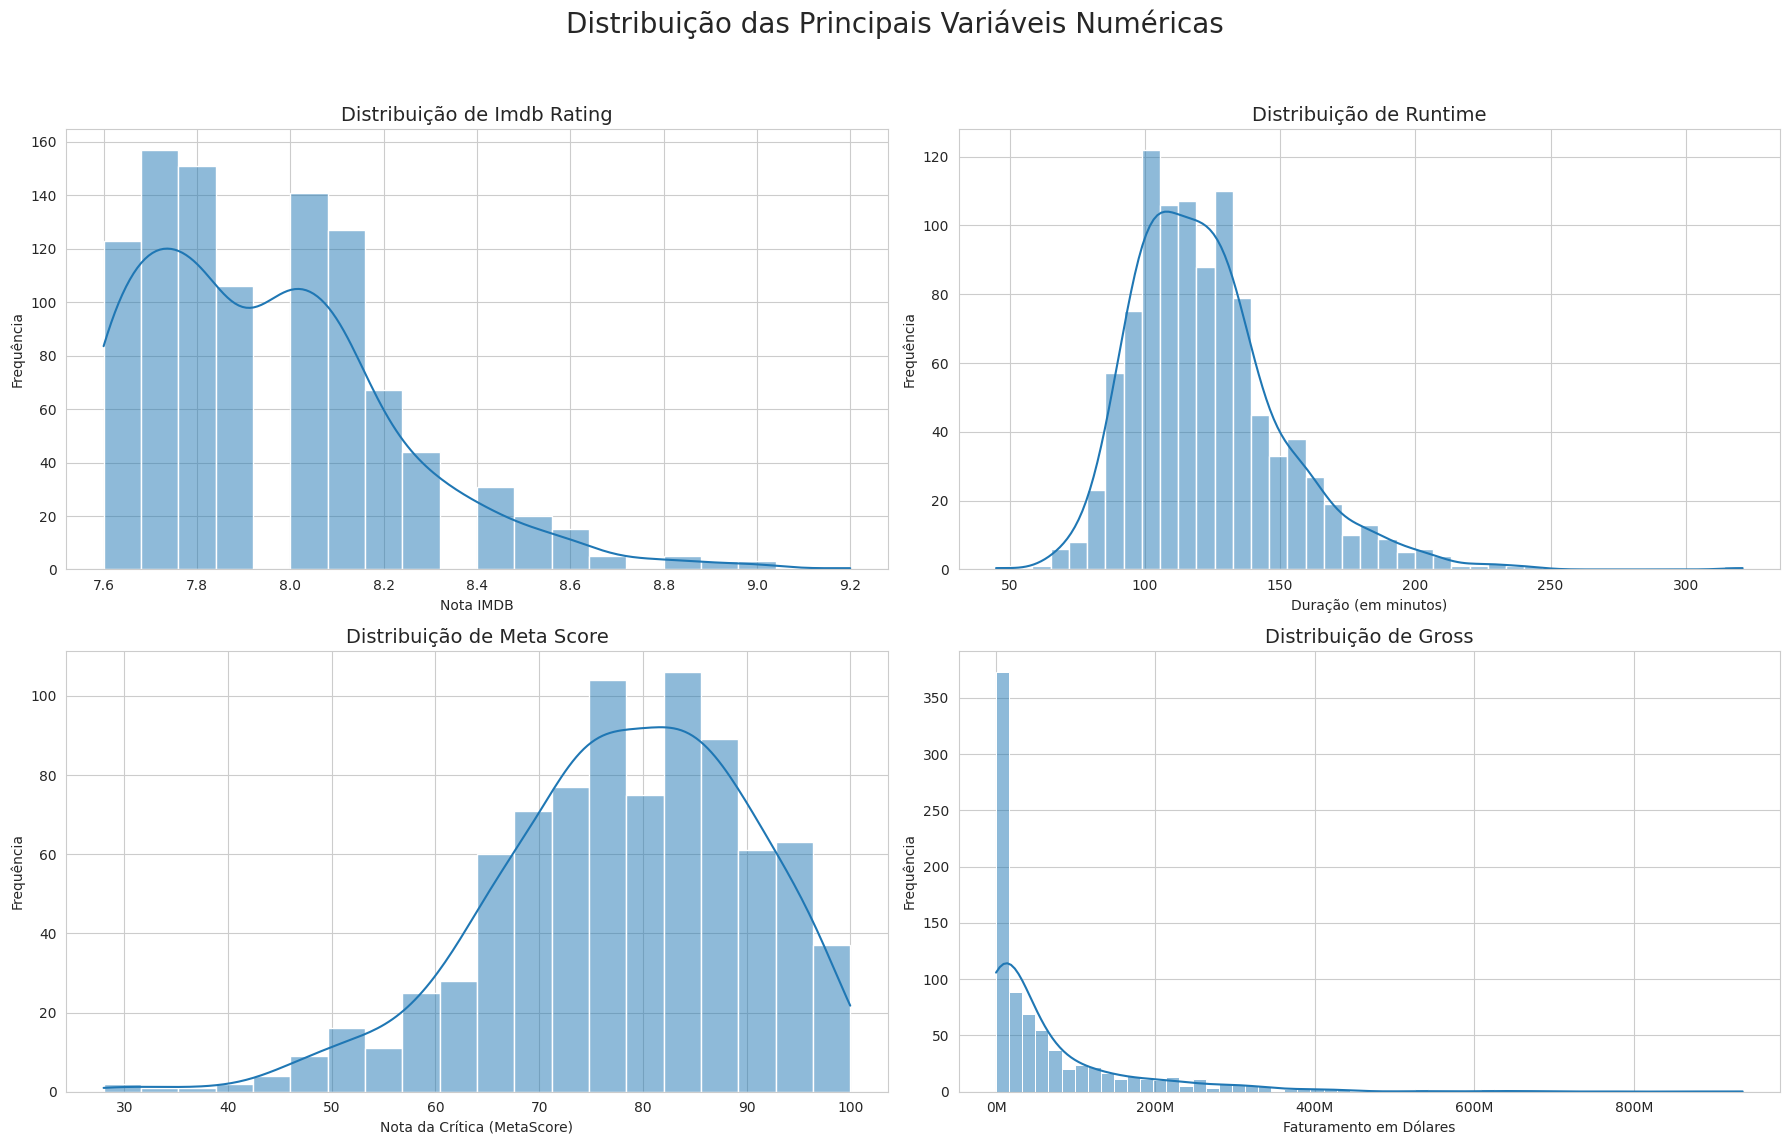

In [11]:
# Histogramas para variáveis numéricas

# Função para formatar os números do eixo de faturamento em Milhões (M)
def formatar_em_milhoes(x, pos):
    return f'{int(x / 1000000)}M'

# Lista das colunas para plotar
colunas_numericas = ['imdb_rating', 'runtime', 'meta_score', 'gross']

# Criando a figura e os eixos para os subplots (2 linhas, 2 colunas)
# Aumentando um pouco o tamanho para comportar os rótulos
fig, axes = plt.subplots(2, 2, figsize=(18, 12))
fig.suptitle('Distribuição das Principais Variáveis Numéricas', fontsize=20)

axes = axes.flatten() # "Achatando" os eixos para um loop simples

# Loop para criar um gráfico para cada coluna
for i, col in enumerate(colunas_numericas):
    ax = axes[i] # Pegando o eixo atual para facilitar a leitura

    sns.histplot(data=df_padronizado, x=col, ax=ax, kde=True)
    ax.set_title(f'Distribuição de {col.replace("_", " ").title()}', fontsize=14)
    ax.set_ylabel('Frequência')

    # Rótulos no Eixo X para TODAS as Colunas
    if col == 'imdb_rating':
        ax.set_xlabel('Nota IMDB')
    elif col == 'runtime':
        ax.set_xlabel('Duração (em minutos)')
    elif col == 'meta_score':
        ax.set_xlabel('Nota da Crítica (MetaScore)')
    elif col == 'gross': # Aplica a formatação especial e o rótulo para 'gross'
        formatter = mticker.FuncFormatter(formatar_em_milhoes)
        ax.xaxis.set_major_formatter(formatter)
        ax.set_xlabel('Faturamento em Dólares')

# Ajustando o layout geral para evitar sobreposições
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

In [12]:
df_padronizado.describe()

,released_year,runtime,imdb_rating,meta_score,no_of_votes,gross
count,998.000000,999.000000,999.000000,842.000000,9.990000e+02,8.300000e+02
mean,1991.214429,122.871872,7.947948,77.969121,2.716214e+05,6.808257e+07
std,23.308539,28.101227,0.272290,12.383257,3.209126e+05,1.098076e+08
min,1920.000000,45.000000,7.600000,28.000000,2.508800e+04,1.305000e+03
25%,1976.000000,103.000000,7.700000,70.000000,5.547150e+04,3.245338e+06
50%,1999.000000,119.000000,7.900000,79.000000,1.383560e+05,2.345744e+07
75%,2009.000000,137.000000,8.100000,87.000000,3.731675e+05,8.087634e+07
max,2020.000000,321.000000,9.200000,100.000000,2.303232e+06,9.366622e+08


## **Insights:**
### **Análise Consolidada: Insights das Variáveis Numéricas**

Após a limpeza dos dados e a visualização das distribuições, aqui os principais insights, combinando a análise visual dos histogramas com as estatísticas descritivas da tabela.

* **imdb_rating (Nossa Target):**
    * A distribuição é assimétrica à esquerda, com um pico em torno de 7.8-8.0. O desvio padrão de apenas **0.27** confirma que as notas são muito consistentes entre os melhores filmes do mundo.

* **gross (Faturamento):**
    * A diferença gritante entre a mediana (**$23.4M**) e a média (**$68.0M**) evidencia o poder dos outliers. O "filme típico" deste dataset fatura em torno de $23M, mas a média é puxada para cima por sucessos como o filme de maior bilheteria, que arrecadou **$936.6M**.

* **runtime (Duração):**
    * A maioria dos filmes se concentra na faixa de 100 a 140 minutos, com uma média de **122.8 minutos**. A existência de filmes muito curtos (mínimo de **45 min**) e muito longos (máximo de **321 min**) sugere que a duração pode ser um fator interessante a se explorar.

* **no_of_votes (Popularidade):**
    * Assim como o faturamento, é uma variável muito assimétrica. A mediana de **138k votos** é muito mais representativa do filme típico do que a média de **271k votos**.

* **meta_score (Nota da Crítica):**
    * Apesar de também ter um pico em notas altas (mediana de **79**), a crítica parece ser mais "exigente" ou ter mais divergências, já que a nota mínima é **28**, em contraste com a mínima de 7.6 do IMDB.



### **Hipóteses Principais**

Com base nesta análise univariada, formulei as seguintes hipóteses para serem investigadas na próxima etapa:

1. Filmes com mais votos (no_of_votes) são mais populares, mas isso não garante uma nota IMDB proporcionalmente maior. A relação pode não ser linear.
2. Filmes sem meta_score podem ter, em média, uma nota IMDB diferente dos filmes que possuem avaliação da crítica, por representarem um nicho de produção diferente.
3. Filmes em diferentes "faixas" de duração (curtos, médios, longos e épicos) podem ter perfis de avaliação distintos.






## **Análise Univariada - Distribuição das Variáveis Categóricas**

Finalizando a análise das variáveis numéricas, vou investigar as categóricas, focando de uma forma que realmente dê pra analisar e adquirir bons insights. O objetivo é descobrir quais são os gêneros, diretores, estrelas e classificações etárias mais comuns no nosso dataset de filmes de sucesso. Para isso, usaremos gráficos de barras (countplots), que são perfeitos para visualizar a frequência de cada categoria.

### **Análise CountPlots**
A análise de frequência das variáveis categóricas ajuda a pintar um retrato do "filme de prestígio típico". Os gráficos revelam padrões claros sobre os tipos de filmes, os talentos envolvidos e o público-alvo que dominam o cenário de alta aclamação.

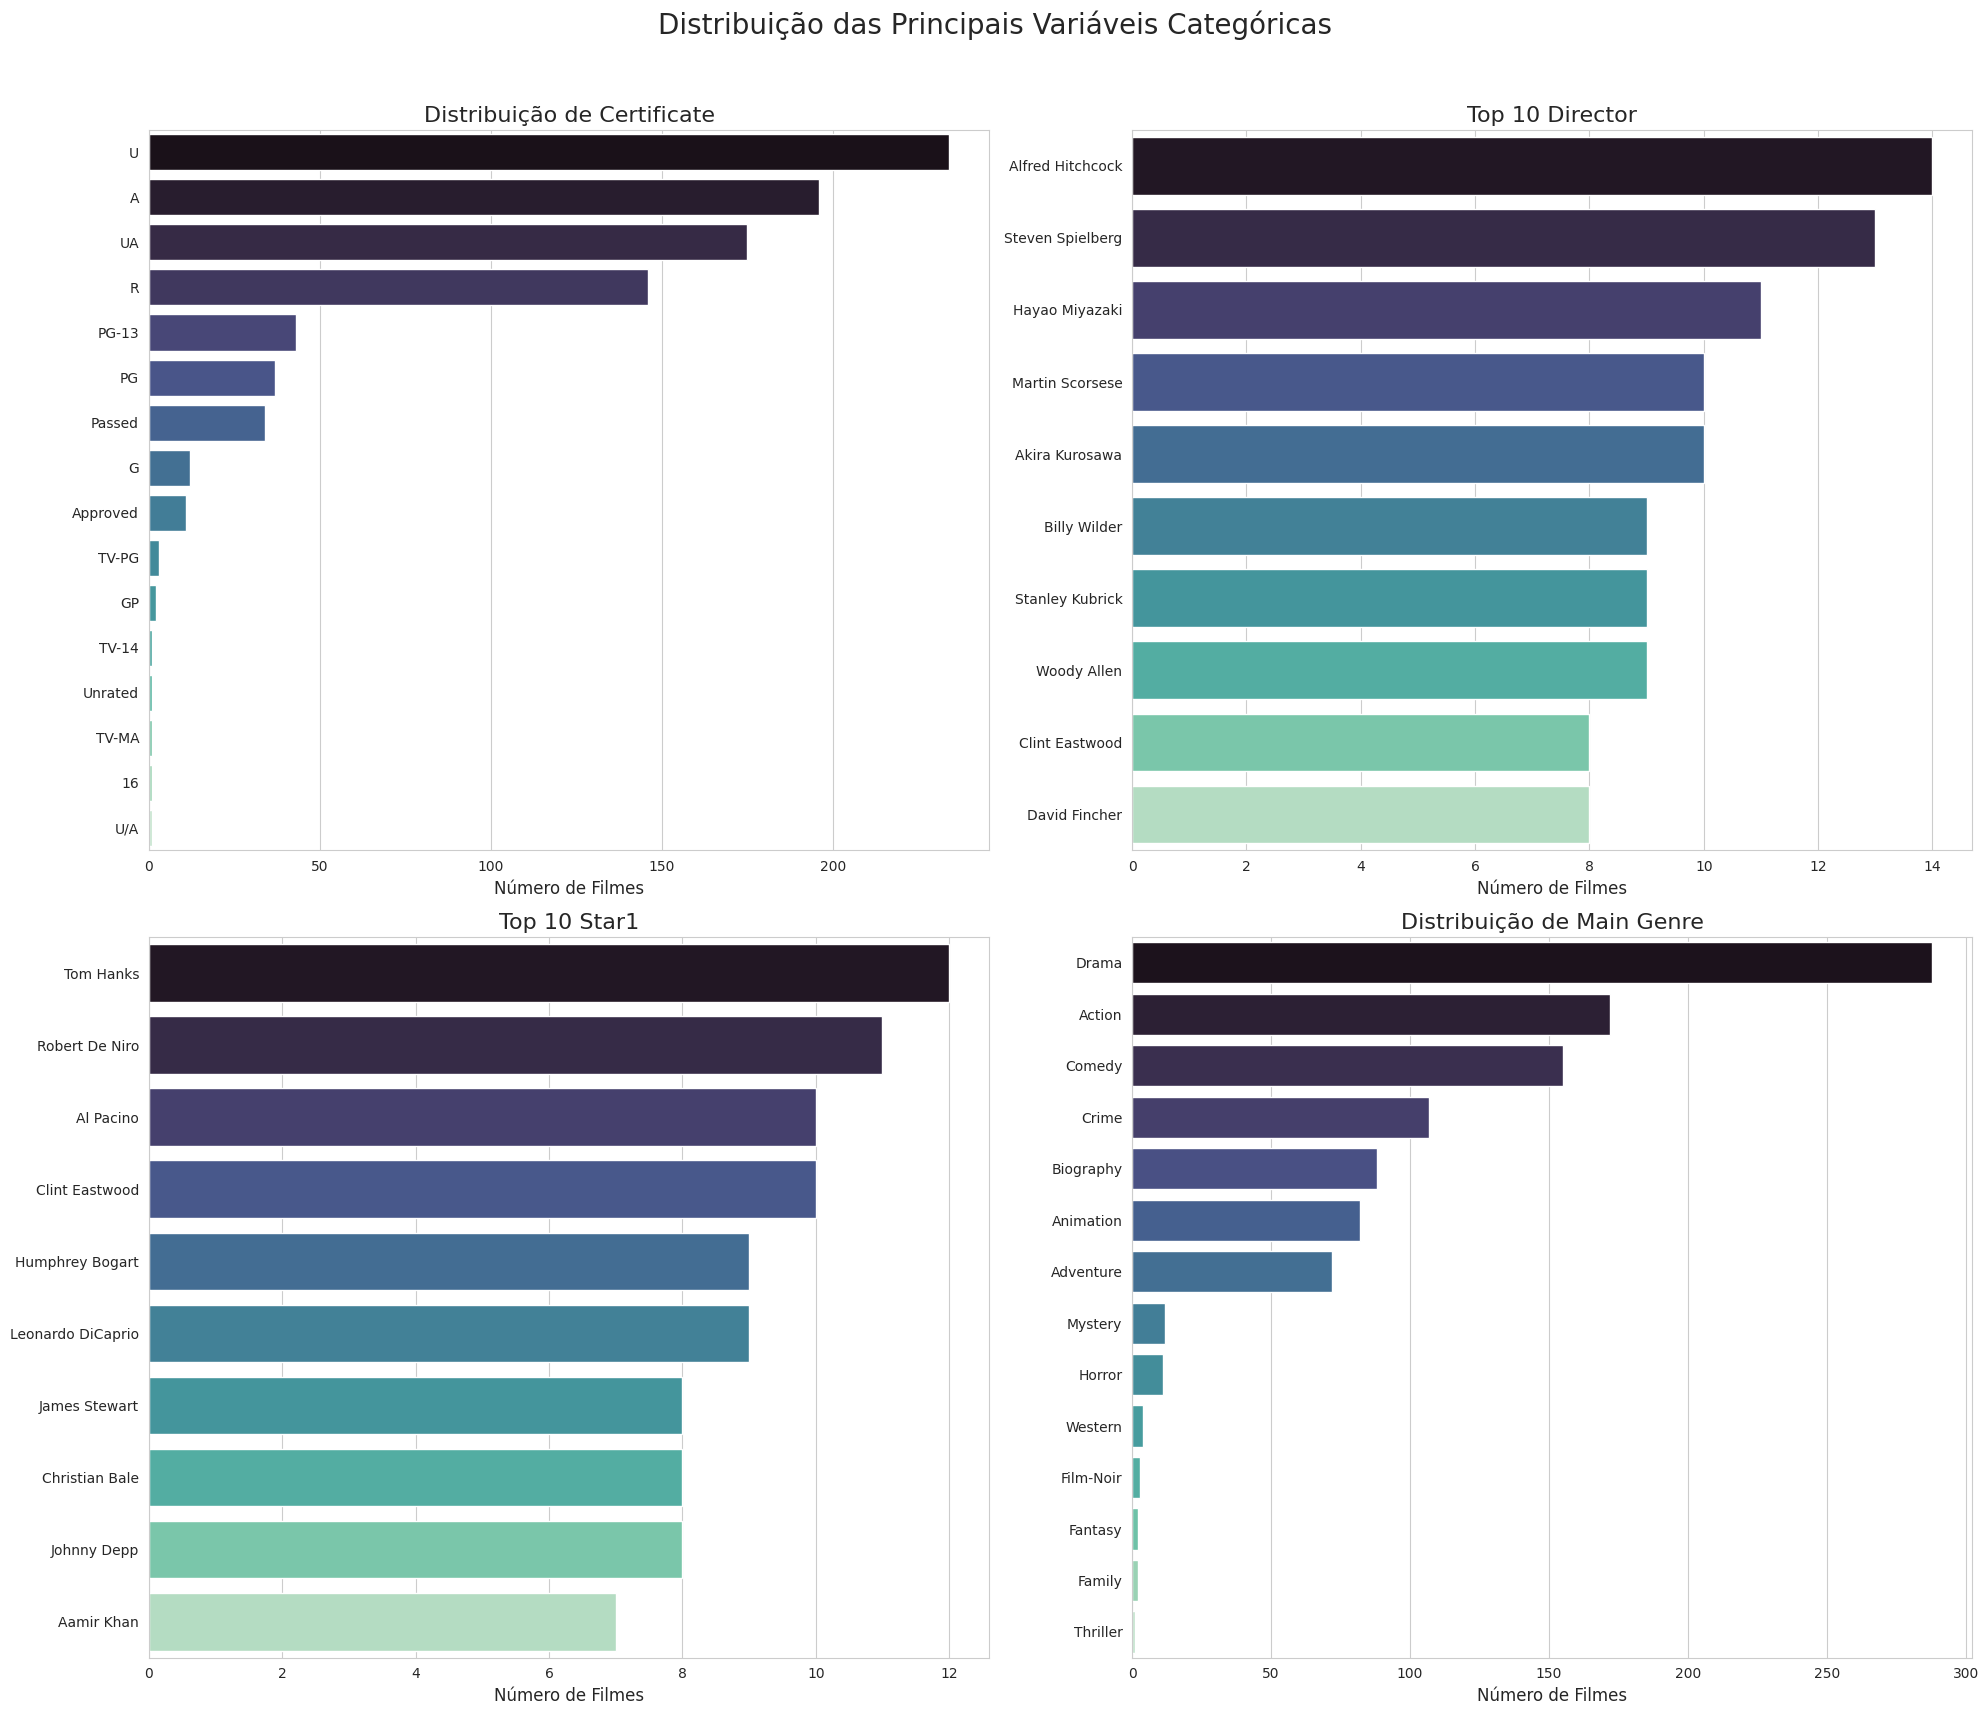

In [37]:
# --- Bloco de Código Final: Análise das Variáveis Categóricas Principais ---

# 1. ADICIONADO: Garantindo a criação da coluna 'main_genre'
# Pega o primeiro gênero da lista na coluna 'genre'
df_padronizado['main_genre'] = df_padronizado['genre'].str.split(',').str[0]

# 2. ATUALIZADO: Lista de colunas, trocando 'star2' por 'main_genre'
colunas_categoricas_vis = ['certificate', 'director', 'star1', 'main_genre']

# Criando a figura e os eixos para os subplots
fig, axes = plt.subplots(2, 2, figsize=(20, 18))
fig.suptitle('Distribuição das Principais Variáveis Categóricas', fontsize=20)

axes = axes.flatten() # "Achatando" os eixos para facilitar o loop

# Loop para criar um gráfico para cada coluna
for i, col in enumerate(colunas_categoricas_vis):
    ax = axes[i]

    # 3. ATUALIZADO: A lógica do Top 10 agora se aplica apenas a 'director' e 'star1'
    if col in ['director', 'star1']:
        top_n = 10
        # Ordena pela contagem e pega os 'top_n' primeiros
        ordem = df_padronizado[col].value_counts().index[:top_n]
        titulo = f'Top {top_n} {col.replace("_", " ").title()}'
    else: # Lógica para 'certificate' e 'main_genre'
        # Ordena pela contagem, mas usa todas as categorias
        ordem = df_padronizado[col].value_counts().index
        titulo = f'Distribuição de {col.replace("_", " ").title()}'

    # Plotando o gráfico de contagem
    sns.countplot(y=col, data=df_padronizado, order=ordem, ax=ax, palette='mako')
    ax.set_title(titulo, fontsize=16)
    ax.set_xlabel('Número de Filmes', fontsize=12)
    ax.set_ylabel('')

# Ajustando o layout para que os títulos e rótulos não se sobreponham
plt.tight_layout(rect=[0, 0.03, 1, 0.96])
plt.show()

### **Análise Consolidada: Insights das Variáveis Categóricas**

**Distribuição de Certificate (Classificação Etária):**
- As classificações **U** (Universal), **A** (Adulto), **UA** (Universal com supervisão) e **R** (Restrito) dominam amplamente. Isso indica que os filmes aclamados se concentram em dois grandes públicos: o público geral/familiar e o público adulto, com menos espaço para nichos muito específicos.

**Top 10 Director:**
- A lista é liderada por mestres do cinema como **Alfred Hitchcock** e **Steven Spielberg**. A presença de diretores clássicos e contemporâneos (como **Christopher Nolan**, que não está no Top 10 mas sabemos que tem filmes na lista) mostra que a "grife" do diretor é um fator atemporal.


 **Implicação para o Negócio:**
 - Investir em um diretor com um histórico comprovado de aclamação é uma das formas mais seguras de evitar os riscos de um projeto e aumentar seu potencial de prestígio.

**Top 10 Star1 (Estrela Principal):**
- Atores como **Tom Hanks**, **Robert De Niro** e **Al Pacino** lideram, representando um pilar de consistência e qualidade. O "star power" do ator principal é claramente um fator relevante.

**Distribuição de Main Genre:**
- Há forte concentração em Drama, seguido por Action e Comedy. Esse desequilíbrio indica que o dataset é dominado por alguns gêneros, o que pode enviesar análises agregadas (médias, medianas, modelos preditivos) para refletir mais as características desses gêneros majoritários do que do universo cinematográfico completo.
### **Hipóteses Principais**

Esta análise nos permite formular hipóteses mais direcionadas para a próxima fase:

1.  Para aqueles certos diretores do top 10, assim como os atores do top 10, mostra a qualidade e relevância deles no mercado cinematográfico.
3. A forte predominância de Drama, Action e Comedy, pode significar uma alta procura por esses tipos de filmes.


## **Análise Bivariada e Multivariada**

Nesta seção, irei explorar a relação entre duas ou mais variáveis simultaneamente. O objetivo é descobrir quais fatores estão mais fortemente associados à nossa variável alvo, **imdb_rating**, e a outras métricas importantes.

### **Análise da Matriz de Dispersão Interativa**

A matriz de dispersão permite visualizar todas as relações entre as variáveis numéricas de uma só vez.

In [38]:
# Matriz de Dispersão Interativa


# Para deixar a legenda do gráfico mais limpa, vamos colorir apenas pelos mais comuns.
top_6_certificates = df_padronizado['main_genre'].value_counts().nlargest(6).index

# Depois, criamos um dataframe temporário apenas com os filmes desses gêneros.
df_plot = df_padronizado[df_padronizado['main_genre'].isin(top_6_certificates)]


# Criando o scatter matrix interativo
fig = px.scatter_matrix(
    data_frame=df_plot,
    dimensions=['imdb_rating', 'meta_score', 'no_of_votes', 'runtime', 'gross'],
    color='main_genre',
    hover_name='series_title',
    title='Matriz de Dispersão Interativa das Variáveis Numéricas por Gênero',
    labels={col: col.replace('_', ' ').title() for col in df_plot.columns}
)

# Ajustando o tamanho do gráfico para melhor visualização
fig.update_layout(width=1200, height=1200)

# Exibindo o gráfico
fig.show()

## **Insights:**

### **Correlação positiva entre popularidade e faturamento**
- Filmes com mais votos (No Of Votes) tendem a concentrar maiores valores de Gross.  
- A relação parece forte em termos gerais, mas há muitos outliers (filmes com muitos votos e faturamento moderado; filmes com alto faturamento e votos não tão altos).

### **Avaliação (IMDb) não é sinônimo de sucesso comercial**
- Títulos com Imdb Rating mais alto (≈ ≥ 8.5) não estão concentrados entre os maiores faturamentos.  
- Muitos blockbusters aparecem com notas médias (~7.6–8.2), sugerindo que sucesso comercial e nota média do público nem sempre andam juntos.

### **Discrepância entre crítica e público**
- Meta Score e Imdb Rating apresentam dispersão considerável: há filmes bem avaliados pela crítica com notas médias do público e vice-versa.  
- A correlação entre essas métricas é fraca ou moderada.

### **Efeito fraco do Runtime**
- Runtime não mostra relação clara com Gross ou No Of Votes.  
- A maior densidade está em runtimes médios (≈ 90–140 min), indicando que duração padrão não garante maior bilheteria nem mais votos.

### **Outliers influentes**
- Existem outliers extremos em Gross (e alguns em No Of Votes) que puxam médias e podem inflar correlações.  

### **Relação possivelmente não-linear**
- A dispersão e a saturação nos extremos sugerem que a relação No Of Votes e Gross é melhor modelada em escala logarítmica ou com modelos não lineares.


## **Análise do Gráfico de Bolhas**

Esta visualização multivariada nos oferece muitos insights estratégicos claros, cruzando popularidade, faturamento e qualidade em um único local.

In [15]:
#  Gráfico de Bolhas Interativo
import plotly.express as px

fig = px.scatter(
    data_frame=df_padronizado.dropna(), # Usamos .dropna() para evitar erros com valores ausentes
    x='no_of_votes',
    y='gross',
    color='imdb_rating',      # A COR da bolha representa a nota do público
    hover_name='series_title',# Mostra o nome do filme ao passar o mouse
    color_continuous_scale=px.colors.sequential.Viridis, # Esquema de cores
    title='Popularidade vs. Faturamento (Colorido por Nota IMDB)'
)

# Customizando o layout para melhor visualização
fig.update_layout(
    width=1000,
    height=700,
    xaxis_title="Popularidade (Nº de Votos)",
    yaxis_title="Faturamento (Gross)"
)

fig.show()

## **Insights:**

A análise da relação entre **popularidade, faturamento e avaliação IMDb** mostra pontos relevantes sobre como esses fatores se conectam.  

**Popularidade vs. Faturamento (No of Votes vs. Gross):**  
- Existe uma tendência positiva clara: filmes mais populares tendem a ter maior faturamento. Porém, a relação não é proporcional para todos os casos — alguns filmes muito votados não arrecadam tanto, enquanto certos sucessos de bilheteria não acumulam tantos votos ao longo do tempo.  

**Faturamento vs. Avaliação (Gross vs. IMDb Rating):**  
- Filmes com altíssimo faturamento não são necessariamente os mais bem avaliados. Muitos blockbusters aparecem com notas medianas (7.6–8.0). Isso sugere que sucesso comercial não garante qualidade percebida pelo público.  

**Filmes bem avaliados (IMDb alto):**  
- Os títulos com notas mais altas (IMDb acima de 8.5) não se concentram entre os maiores faturamentos. Isso indica que filmes de nicho ou mais artísticos podem alcançar grande reconhecimento crítico mesmo sem resultados comerciais expressivos.  

**Distribuição típica:**  
- A maior parte dos filmes se concentra em até 0.5M votos e 200M de faturamento, representando o “perfil médio” do dataset.  

### **Hipóteses Principais**

1. No Of Votes está positivamente associada a Gross.  
2. O efeito marginal de votos sobre faturamento diminui em níveis muito altos.
3. Alguns filmes de altíssimo faturamento puxam a correlação, sem eles a associação é mais fraca.



## **Análise do gráfico Box Plot**

Agora, irei investigar como a nota do IMDB se distribui entre as diferentes categorias de filmes. O objetivo é simples, responder a perguntas como: "Qual gênero de filme tende a ter as notas mais altas?".


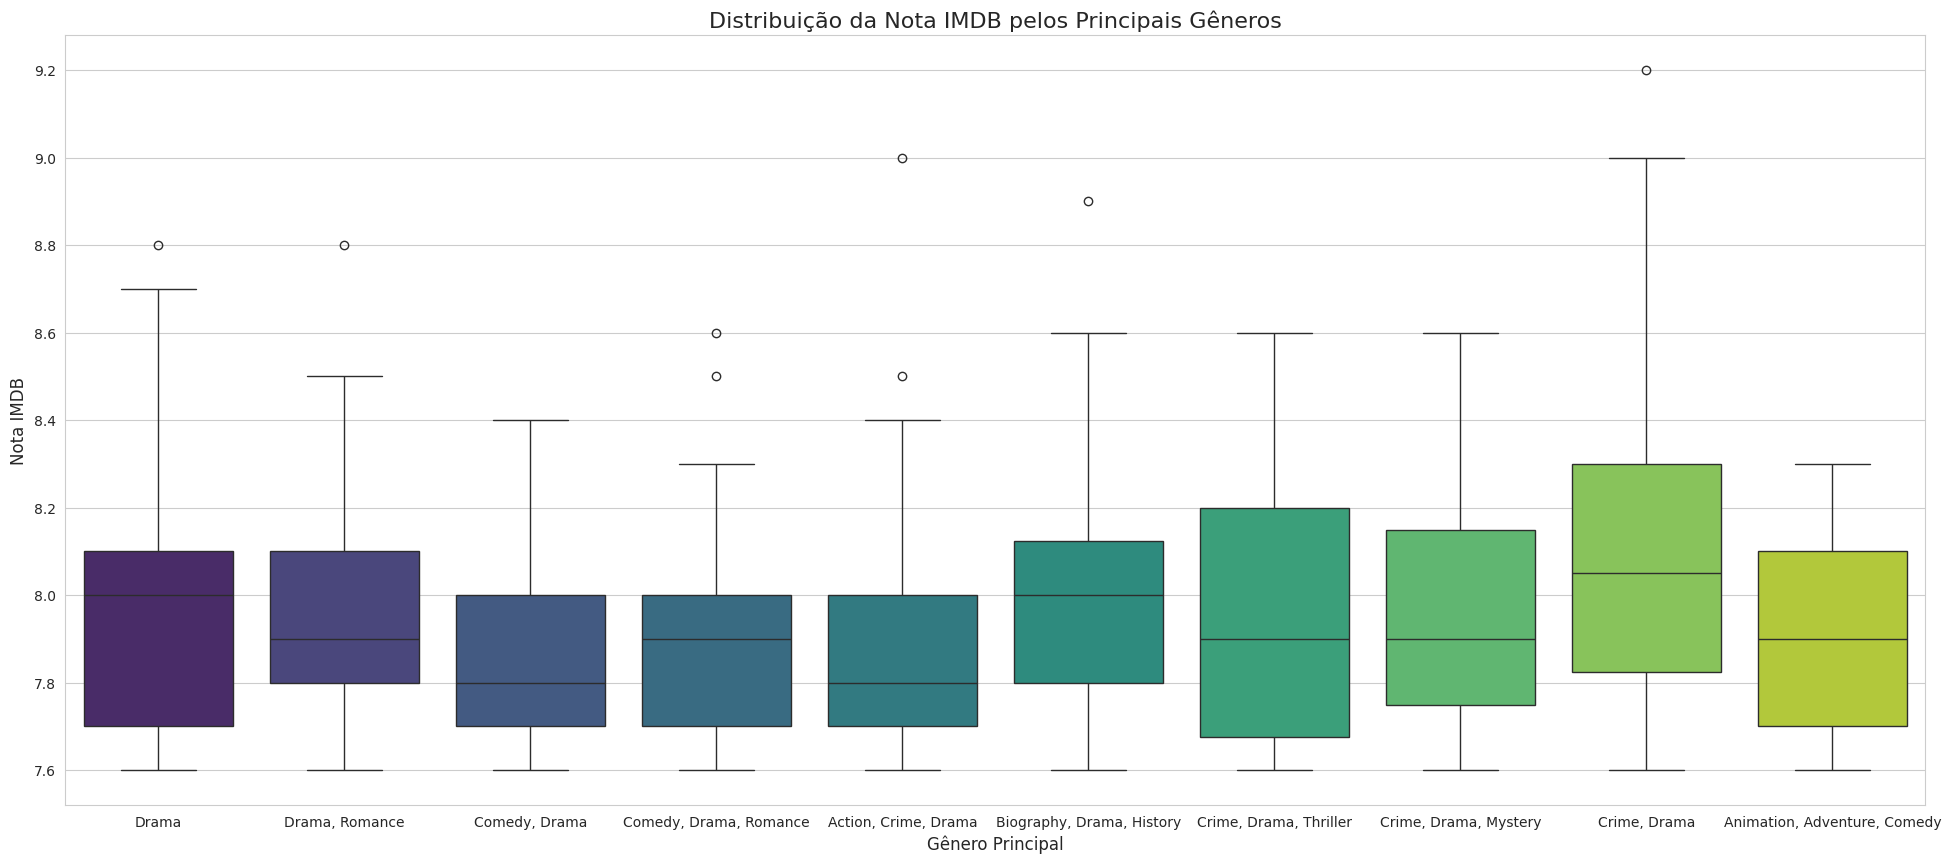

In [36]:
# Box Plot
top_6_genres = df_padronizado['genre'].value_counts().nlargest(10).index
df_top_genres = df_padronizado[df_padronizado['genre'].isin(top_6_genres)]

plt.figure(figsize=(24, 10))

# Criação do box plot com o gênero no eixo X e a nota no eixo Y
sns.boxplot(data=df_top_genres, x='genre', y='imdb_rating', palette='viridis',
            order=top_6_genres) # Ordena as caixas pela frequência do gênero

plt.title('Distribuição da Nota IMDB pelos Principais Gêneros', fontsize=16)
plt.xlabel('Gênero Principal', fontsize=12)
plt.ylabel('Nota IMDB', fontsize=12)
plt.show()

## **Insights:**
**Concentração e faixa estreita de notas:**
- A maioria das notas IMDB está concentrada numa faixa estreita (aprox. 7.6–8.4). Diferenças absolutas entre medianas dos gêneros são pequenas — avaliações centram-se em valores altos e consistentes.

 **Gêneros com mediana ligeiramente superior:**
-  *Animation, Adventure, Comedy* e *Biography, Drama, History* mostram medianas um pouco acima da média do conjunto, sugerindo tendência a avaliações ligeiramente melhores.

 **Variabilidade distinta por gênero:**
-  Alguns gêneros apresentam IQR e whiskers mais largos (maior dispersão interna), enquanto outros têm caixas compactas (avaliações mais consistentes).

 **Outliers e máximos excepcionais:**
-  Existem outliers de nota muito alta (> \~8.6) em gêneros específicos — títulos excepcionais que elevam a cauda superior.

 **Ausência de separador claro “melhor/pior”:**
-  Não há gêneros com notas drasticamente piores ou melhores; o efeito do gênero sobre a nota parece moderado.

 **Possível influência de sample size e multi-gênero:**
-  Diferenças observadas podem refletir tamanhos de amostra distintos e sobreposição de gêneros (filmes multi-gênero rotulados por um “gênero principal”).

**Hipóteses Principais**

1. As medianas de IMDb variam entre gêneros de forma estatisticamente significativa.
2. Alguns gêneros têm variância de notas significativamente maior, indicando maior dispersão interna de avaliações.
3. Ao controlar por No Of Votes, Year e Runtime em um modelo multivariado, o efeito do gênero sobre a nota diminui substancialmente.


---
## **Respondendo às Perguntas de Negócio**

Nesta seção, será respondida as perguntas propostas no desafio, utilizando os insights gerados em toda a Análise Exploratória de Dados.

### **Pergunta 1: Qual filme você recomendaria para uma pessoa que você não conhece?**

A recomendação mais segura para uma pessoa desconhecida seria um filme que minimiza o risco de desagradar, ou seja, um que seja quase universalmente aclamado e extremamente popular. Para isso, buscamos a combinação de:
1.  **Aclamação máxima do público (a maior imdb_rating).**
2.  **Popularidade massiva (um no_of_votes altíssimo).**
3.  **Boa recepção da crítica (um meta_score elevado).**

Filtrando nosso dataset por esses critérios, o filme que melhor se encaixa é **"The Godfather". Ele consistentemente ocupa o primeiro lugar em nota no IMDb e Meta Score, possui um número gigantesco de votos (indicando que foi visto e avaliado por milhões de pessoas com gostos diferentes) e pertence ao gênero Drama, que a análise mostrou ser o mais comum entre os filmes de elite.

### **Pergunta 2: Quais são os principais fatores que estão relacionados com alta expectativa de faturamento de um filme?**

A análise bivariada, especialmente o gráfico de bolhas, revelou uma hierarquia clara de fatores:

1.  **Popularidade e Engajamento (Número de Votos):** Este é o fator com a correlação mais forte e direta com o faturamento (gross). Nossos gráficos mostram que um alto número de votos é um indício interessante para um bom faturamento.

2.  **"Star Power" (Diretores e Elenco de Renome):** Nossa análise de frequência mostrou que um pequeno e seletivo grupo de diretores e estrelas está associado a múltiplos filmes de sucesso. Embora não seja uma garantia, associar um projeto a esses nomes aumenta a visibilidade, a popularidade inicial e, consequentemente, o potencial de bilheteria.

**Fator com Menor Influência Direta: Qualidade Percebida (Notas IMDb/Meta Score):** Surpreendentemente, a correlação entre as notas de avaliação e o faturamento é muito fraca. Vimos claramente que filmes com notas perfeitas podem ter faturamento modesto, e blockbusters de quase um bilhão de dólares podem ter notas apenas "boas". Sucesso financeiro e aclamação são objetivos de negócio distintos.

### **Pergunta 3: Quais insights podem ser tirados com a coluna Overview? É possível inferir o gênero do filme a partir dessa coluna?**

A coluna overview (sinopse) é uma fonte rica de dados de texto que pode gerar vários insights através de **Processamento de Linguagem Natural (NLP)**.

####**Insights Possíveis:**
- Podemos criar nuvens de palavras para cada gênero e descobrir os temas e termos mais recorrentes. "War", "love", "mission", "family" provavelmente apareceriam com frequências diferentes em gêneros distintos.
- Podemos analisar o sentimento (positivo, negativo, neutro) das sinopses para ver se existe alguma correlação com as notas do filme.

#### **É possível inferir o gênero?**
**Sim, absolutamente.** Esta é uma tarefa clássica de **classificação de texto**.

#**4. Divisão dos dados em Treino e Teste**

Nesta seção, vou colocar o plano de modelagem em prática. Começaremos separando nossas variáveis, dividindo o dataset em conjuntos de treino e teste, e depois será feita a parte do pré-processamento os dados antes de treinar os modelos.

### **Seleção das Variáveis Preditivas e Variável Alvo.**

O primeiro passo é separar o dataframe em duas partes:

- **y (alvo):** A variável que quero prever, que no caso é a imdb_rating.

- **X (features):** Todas as variáveis que usarei para fazer a previsão, conforme definido no plano.

In [39]:

# Definindo a lista de colunas que serão usadas como features
features = [
    'meta_score',
    'no_of_votes',
    'runtime',
    'gross',
    'released_year',
    'main_genre',
    'certificate',
    'director',
    'star1'
]

# Definindo a coluna alvo
target = 'imdb_rating'

# Criando os dataframes X e y a partir do dataframe padronizado
X = df_padronizado[features]
y = df_padronizado[target]

# Verificar as dimensões para garantir que tudo está correto
print("Dimensões das Features (X):", X.shape)
print("Dimensões do Alvo (y):", y.shape)

Dimensões das Features (X): (999, 9)
Dimensões do Alvo (y): (999,)


### **Divisão dos Dados em Treino e Teste**

Para avaliar a performance real do modelo, precisamos simular uma situação onde ele faz previsões em dados que nunca viu antes. Para isso, dividimos o dataset em dois conjuntos:

**Conjunto de Treino:** A maior parte dos dados (~80%). O modelo usará este conjunto para "aprender" os padrões.

**Conjunto de Teste:** Uma porção menor (~20%) que será mantida "escondida" do modelo durante o treino. Usaremos este conjunto no final para ver o quão bem o modelo generaliza para novos dados.

In [40]:
# Importar a função necessária do scikit-learn
from sklearn.model_selection import train_test_split

# Realizar a divisão
# test_size=0.2 significa que 20% dos dados irão para o conjunto de teste
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Verificar as dimensões dos conjuntos resultantes
print("Dimensões de X_train:", X_train.shape)
print("Dimensões de X_test:", X_test.shape)
print("Dimensões de y_train:", y_train.shape)
print("Dimensões de y_test:", y_test.shape)

Dimensões de X_train: (799, 9)
Dimensões de X_test: (200, 9)
Dimensões de y_train: (799,)
Dimensões de y_test: (200,)


### **Organização das Features**
O primeiro passo é separar os nomes das colunas em listas distintas, de acordo com o tipo de pré-processamento que cada grupo receberá: numérico, categórico de baixa cardinalidade e categórico de alta cardinalidade.

In [41]:
# Importações e Definição das Colunas

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

# Separando as colunas por tipo de tratamento
numeric_features = ['meta_score', 'no_of_votes', 'runtime', 'gross', 'released_year']
categorical_low_card_features = ['main_genre', 'certificate']
categorical_high_card_features = ['director', 'star1']

# **Modelagem e Pré-processamento dos Dados**

## **Planejamento do Modelo Preditivo**

Nesta seção, detalho a metodologia completa para a construção do modelo de Machine Learning, respondo às perguntas do desafio e estabeleço o plano para a previsão da nota IMDB.

### **Qual tipo de problema estou resolvendo (regressão, classificação)?**

Estou resolvendo um problema de **Regressão**.

- **Por quê?** O meu objetivo é prever a variável imdb_rating, que é um valor numérico contínuo (pode ser 7.9, 8.1, 9.2, etc.). Problemas de regressão são aqueles em que buscamos prever uma quantidade. Se, por outro lado, eu estivesse tentando prever o gênero de um filme ou uma classificação como "bom/ruim/excelente", seria um problema de classificação.


### **Quais variáveis e/ou suas transformações utilizei e por quê?**

Com base na nossa Análise Exploratória de Dados (EDA), selecionei um conjunto de variáveis (features) com alto potencial preditivo e planejei as seguintes transformações:

- **1. Variáveis Numéricas Utilizadas:**
  - **Features:** meta_score, no_of_votes, runtime, gross, released_year.
  - **Por quê?** Nossa EDA, especialmente a matriz de dispersão, mostrou que, embora nem todas tenham uma correlação linear forte, elas contêm informações quantitativas relevantes. meta_score (opinião da crítica) e no_of_votes (popularidade) são, intuitivamente e visualmente, fortes candidatos a influenciar a nota do público.
  - Transformações Planejadas:
    - Tratamento de Nulos: Para meta_score e gross, que possuem valores ausentes, usarei a técnica de imputação pela mediana. Escolhi a mediana em vez da média porque ambas as variáveis são muito assimétricas (com outliers), e a mediana é uma medida mais robusta e menos sensível a esses valores extremos. Este cálculo será feito apenas no conjunto de treino para evitar data leakage.
    - Escalonamento (Scaling): Embora modelos de árvore não exijam, como boa prática, aplicarei uma padronização (StandardScaler) nas features numéricas. Isso centraliza os dados (média 0, desvio padrão 1), o que é benéfico para muitos algoritmos e garante que nenhuma variável domine as outras apenas pela sua escala.

- **2. Variáveis Categóricas Utilizadas:**
  - **Features:** main_genre, certificate, director, star1.
  - **Por quê?** Vimos na EDA que certas categorias são muito mais frequentes e podem estar associadas a notas mais altas. O gênero de um filme, seu diretor e elenco principal são informações fundamentais no mundo real.
  - Transformações Planejadas:
    - One-Hot Encoding: Para main_genre e certificate, que têm um número limitado de categorias, usarei o One-Hot Encoding. Isso transforma cada categoria em uma nova coluna binária (0 ou 1), permitindo que o modelo interprete a presença ou ausência de uma categoria.
    - Tratamento de Alta Cardinalidade: As colunas director e star1 têm centenas de valores únicos (alta cardinalidade). Usar One-Hot Encoding aqui criaria centenas de novas colunas, o que é ineficiente. A estratégia será manter apenas os Top 20 diretores e estrelas mais frequentes e agrupar todos os outros em uma única categoria "Outro". Isso captura a informação mais relevante sem sobrecarregar o modelo.

- **3. Variáveis Descartadas:**
  - series_title, overview e star2, star3, star4 serão descartadas para este modelo inicial. Títulos são únicos e não têm poder preditivo direto. overview exigiria técnicas complexas de NLP. As outras estrelas foram omitidas para manter o modelo mais simples e evitar redundância.


### **Qual modelo melhor se aproxima dos dados e quais seus prós e contras?**

Minha abordagem será comparar um modelo simples (baseline) com um modelo mais complexo e robusto.

- **1. Modelo de Baseline: LinearRegression (Regressão Linear)**
  - Prós: É um modelo extremamente rápido, simples e interpretável. Ao final do treino, eu poderia olhar os coeficientes de cada feature para entender (de forma linear) qual o seu impacto na nota IMDB.
  - Contras: É um modelo muito simplista. Ele assume que a relação entre as variáveis e a nota é perfeitamente linear, o que nossa EDA já mostrou que não é verdade para a maioria dos casos. É muito sensível a outliers e provavelmente terá uma performance preditiva baixa.

- **2. Modelo Principal: RandomForestRegressor (Floresta Aleatória)**
  - Este modelo provavelmente se ajustará muito melhor aos nossos dados.
  - Prós:
    - Excelente Performance: É um dos modelos mais poderosos para problemas tabulares como o nosso.
    - Captura Relações Não-Lineares: Ele não assume linearidade e consegue capturar interações complexas entre as variáveis (ex.: a duração ideal pode ser diferente para um drama e para uma comédia).
    - Robusto a Outliers: Por ser baseado em árvores de decisão, ele é naturalmente mais resistente aos valores extremos que vimos em gross e no_of_votes.
  - Contras:
    - Baixa Interpretabilidade (Modelo "Caixa-Preta"): É muito difícil entender exatamente por que o modelo deu uma nota específica. Posso ver a importância geral de cada feature, mas não uma relação simples como na regressão linear.
    - Mais Lento para Treinar: Por ser um conjunto de muitas árvores de decisão, é computacionalmente mais intensivo que um modelo linear.


### **Qual medida de performance do modelo escolhi e por quê?**

A principal medida de performance escolhida será a RMSE (Root Mean Squared Error - Raiz do Erro Quadrático Médio).

- **Por quê?**
  - Interpretabilidade na Mesma Unidade: O valor do RMSE está na mesma unidade da nossa variável alvo, a nota IMDB. Um RMSE de 0.25, por exemplo, significa que, em média, as previsões do nosso modelo erram a nota do filme em 0.25 pontos. Isso é muito fácil de comunicar e entender.
  - Penalização de Grandes Erros: Ao elevar os erros ao quadrado (Squared), o RMSE penaliza erros grandes de forma muito mais severa do que erros pequenos. Para um negócio como a produção de filmes, errar uma previsão por 1 ponto é muito pior do que errar duas vezes por 0.5 pontos. O RMSE reflete essa preferência de negócio.


### **Definição dos Pipelines de Transformação**

Com as colunas organizadas, defino agora um pipeline de transformação específico para cada grupo. Cada pipeline é uma sequência de etapas de pré-processamento:

- **numeric_transformer:** Para as features numéricas, o pipeline irá primeiro preencher valores ausentes com a mediana da coluna e, em seguida, aplicar uma padronização (StandardScaler).
- **categorical_low_card_transformer:** Para as features categóricas com poucas categorias (main_genre, certificate), o pipeline preencherá valores ausentes com a string 'missing' e depois aplicará o OneHotEncoder.
- **categorical_high_card_transformer:** Para as features com muitas categorias (director, star1), o pipeline preencherá os nulos com o valor mais frequente e aplicará um OneHotEncoder que agrupa categorias raras, mantendo apenas as 20 mais comuns.

In [42]:
# Criando os Pipelines de Transformação

# Criando o pipeline para features NUMÉRICAS
#Preenchendo valores nulos (NaN) com a mediana
# Escalonando os dados (padronização)
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

#Criando o pipeline para features CATEGÓRICAS de baixa cardinalidade
# Preenchendo valores nulos com uma constante 'missing'
# Aplicando One-Hot Encoding
categorical_low_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Criando o pipeline para features CATEGÓRICAS de alta cardinalidade
# manter apenas os Top 20 e agrupar o resto.
categorical_high_card_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore', max_categories=20)) # Mantém os 19 mais comuns + 1 'infrequent'
])

### **Unificação com ColumnTransformer**

O passo final é utilizar o ColumnTransformer para unificar os três pipelines de transformação em um único objeto pré-processador (preprocessor). Este objeto aplicará de forma inteligente o tratamento correto a cada coluna do dataset, garantindo que o processo seja consistente e robusto.

In [43]:
# Unindo tudo com ColumnTransformer

# Criando o pré-processador que aplica o transformer correto a cada tipo de coluna
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat_low', categorical_low_card_transformer, categorical_low_card_features),
        ('cat_high', categorical_high_card_transformer, categorical_high_card_features)
    ],
    remainder='passthrough' # Mantém colunas não especificadas (se houver)
)

print(preprocessor)

ColumnTransformer(remainder='passthrough',
                  transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaler', StandardScaler())]),
                                 ['meta_score', 'no_of_votes', 'runtime',
                                  'gross', 'released_year']),
                                ('cat_low',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(fill_value='missing',
                                                                strategy='constant')),
                                                 ('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['main_genre', 'certificate']),
                                ('cat_high',
             

# **Testes e Avaliações Finais dos Modelo**

## **Treinamento do Modelo de Baseline - Regressão Linear**

Com o pré-processador pronto, o próximo passo é integrá-lo a um modelo para criar um pipeline de machine learning completo. Começarei com um modelo de Regressão Linear como meu baseline. O objetivo é estabelecer uma performance de referência para que eu possa avaliar o ganho obtido com modelos mais complexos.

In [44]:
# Treinando o Pipeline com Regressão Linear

# Importando as classes necessárias
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import numpy as np

# Criando o pipeline final, unindo o pré-processador e o modelo
pipeline_linear = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Treinando o pipeline completo com os dados de treino
pipeline_linear.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazendo previsões no conjunto de teste
previsoes_linear = pipeline_linear.predict(X_test)

#Calculando e exibindo o RMSE
rmse_linear = np.sqrt(mean_squared_error(y_test, previsoes_linear))
print(f"\nRMSE do modelo de Regressão Linear (Baseline): {rmse_linear:.4f}")

Iniciando o treinamento do modelo de Regressão Linear...
Treinamento concluído!

RMSE do modelo de Regressão Linear (Baseline): 0.2188


## **Análise do Desempenho do Baseline**

Após treinar o modelo de Regressão Linear, obtive um RMSE de 0.2188. Este valor é a minha referência inicial de desempenho. Um RMSE de ~0.22 significa que, em média, as previsões do modelo estão errando a nota IMDB em aproximadamente 0.22 pontos, o que já é um resultado bastante preciso.

Para visualizar a performance, vou criar um gráfico de dispersão que compara os valores reais do conjunto de teste (y_test) com as previsões feitas pelo modelo.

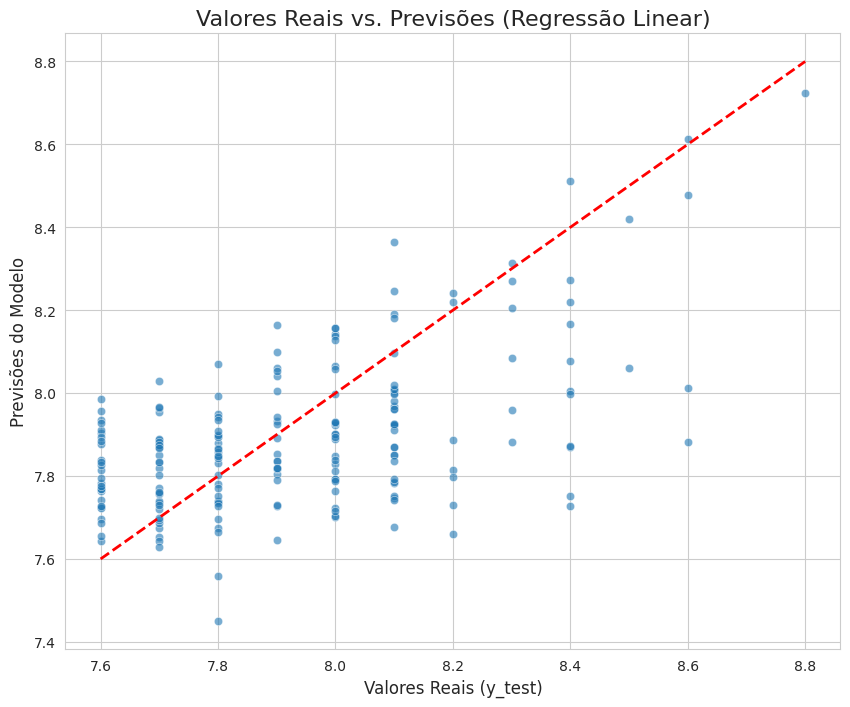

In [45]:
# Visualizando as Previsões do Modelo Linear

plt.figure(figsize=(10, 8))

# O gráfico de dispersão (scatter plot) com os valores reais no eixo X e as previsões no eixo Y
sns.scatterplot(x=y_test, y=previsoes_linear, alpha=0.6)

# Adicionando uma linha de referência vermelha (y=x).
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)

plt.title('Valores Reais vs. Previsões (Regressão Linear)', fontsize=16)
plt.xlabel('Valores Reais (y_test)', fontsize=12)
plt.ylabel('Previsões do Modelo', fontsize=12)
plt.show()

O modelo linear funciona bem como baseline, com erro baixo e previsões consistentes, mas mostra limitações em capturar valores muito altos ou muito baixos de IMDb (porque “puxa para a média”). Isso abre espaço para tentar modelos mais complexos (como Random Forest ou Gradient Boosting), que podem lidar melhor com não-linearidades e efeitos de interação.

## **Treinamento do Modelo Principal (Random Forest)**
Com o desempenho do meu modelo de baseline estabelecido, o próximo passo é treinar um modelo mais avançado para tentar superar essa marca. Conforme o planejamento, utilizarei o RandomForestRegressor, que é robusto e capaz de capturar relações não-lineares nos dados. O processo de criação do pipeline é o mesmo, apenas trocando o estimador final.

In [46]:
# Treinando o Pipeline com Random Forest

# Importando o RandomForestRegressor
from sklearn.ensemble import RandomForestRegressor

# Criando o pipeline final com o Random Forest
pipeline_rf = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('regressor', RandomForestRegressor(random_state=42, n_jobs=-1)) # n_jobs=-1 usa todos os processadores para acelerar
])

# Treinando o pipeline completo com os dados de treino
pipeline_rf.fit(X_train, y_train)
print("Treinamento concluído!")

# Fazendo previsões no conjunto de teste
previsoes_rf = pipeline_rf.predict(X_test)

# Calculando e exibir o RMSE para comparação
rmse_rf = np.sqrt(mean_squared_error(y_test, previsoes_rf))
print(f"\nRMSE do modelo Random Forest: {rmse_rf:.4f}")
print(f"RMSE do modelo de Regressão Linear (Baseline): {rmse_linear:.4f}")

Treinamento concluído!

RMSE do modelo Random Forest: 0.1954
RMSE do modelo de Regressão Linear (Baseline): 0.2188


## **Avaliação Final e Comparação dos Modelos**
Com os dois modelos treinados, o passo final desta etapa é compará-los diretamente, tanto de forma quantitativa (através da métrica RMSE) quanto de forma visual. Para a visualização, vou criar dois gráficos de dispersão lado a lado, comparando as previsões de cada modelo com os valores reais. Isso me permitirá ver qual nuvem de pontos se alinha melhor à "linha da perfeição".

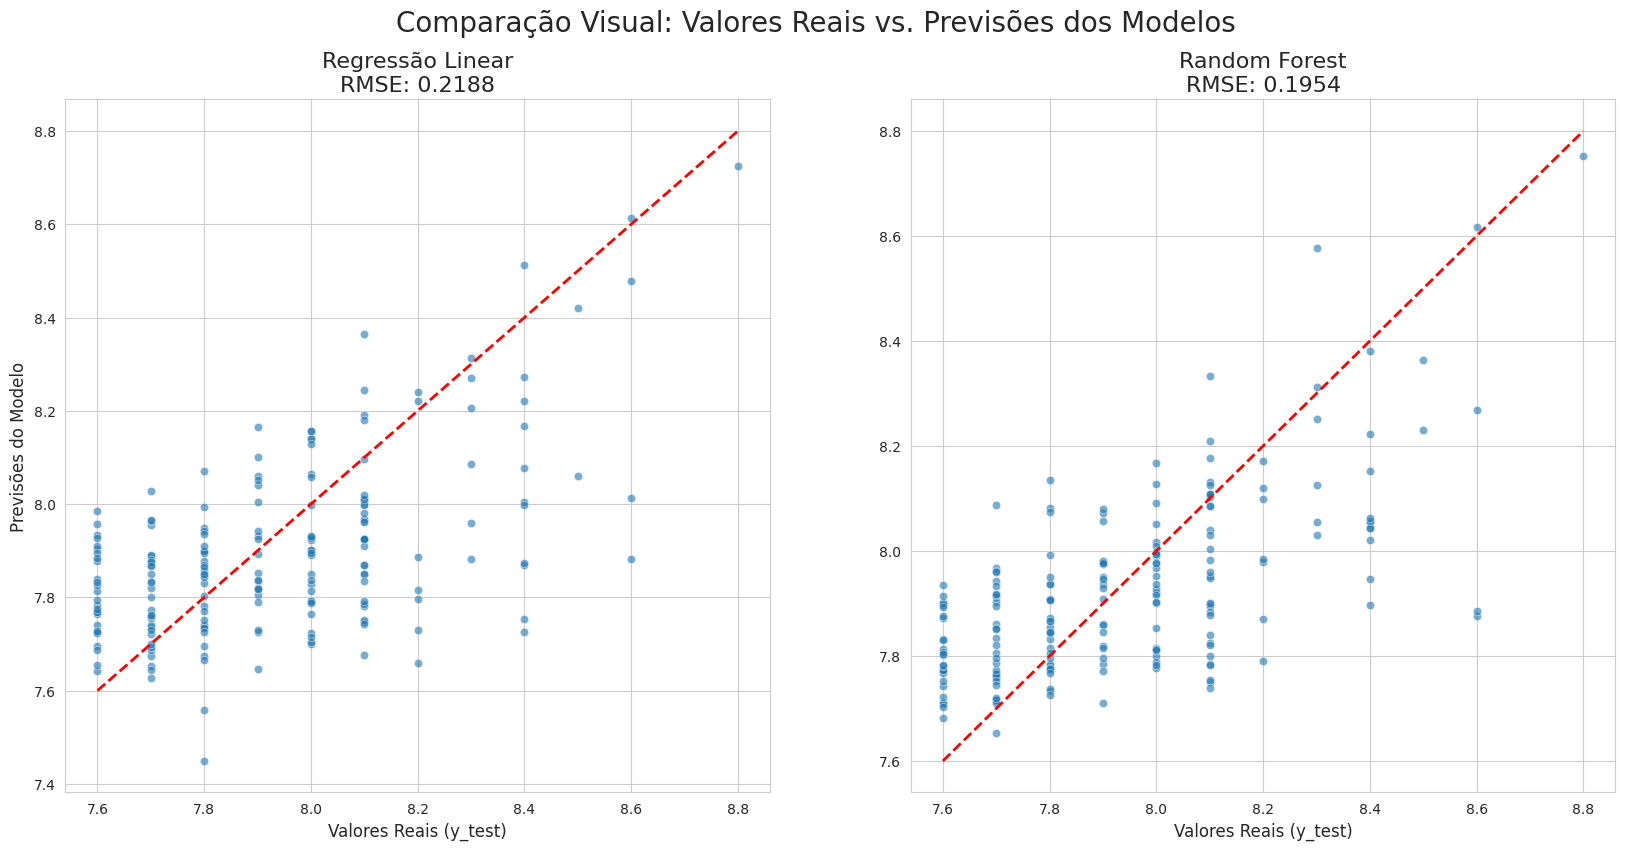

In [47]:
# Comparação Visual dos Modelos

# Criando a figura que abrigará os dois gráficos (1 linha, 2 colunas)
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 9))
fig.suptitle('Comparação Visual: Valores Reais vs. Previsões dos Modelos', fontsize=20)

# Gráfico 1: Regressão Linear (Baseline)
sns.scatterplot(x=y_test, y=previsoes_linear, ax=ax1, alpha=0.6)
# Adicionando a linha de referência
ax1.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
# Adicionando o valor do RMSE no título do gráfico
ax1.set_title(f'Regressão Linear\nRMSE: {rmse_linear:.4f}', fontsize=16)
ax1.set_xlabel('Valores Reais (y_test)', fontsize=12)
ax1.set_ylabel('Previsões do Modelo', fontsize=12)

# Gráfico 2: Random Forest
sns.scatterplot(x=y_test, y=previsoes_rf, ax=ax2, alpha=0.6)
# Adicionando a linha de referência vermelha
ax2.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--', color='red', linewidth=2)
# Adicionando o valor do RMSE no título do gráfico
ax2.set_title(f'Random Forest\nRMSE: {rmse_rf:.4f}', fontsize=16)
ax2.set_xlabel('Valores Reais (y_test)', fontsize=12)
ax2.set_ylabel('') # Removendo o rótulo Y para um visual mais limpo

plt.show()

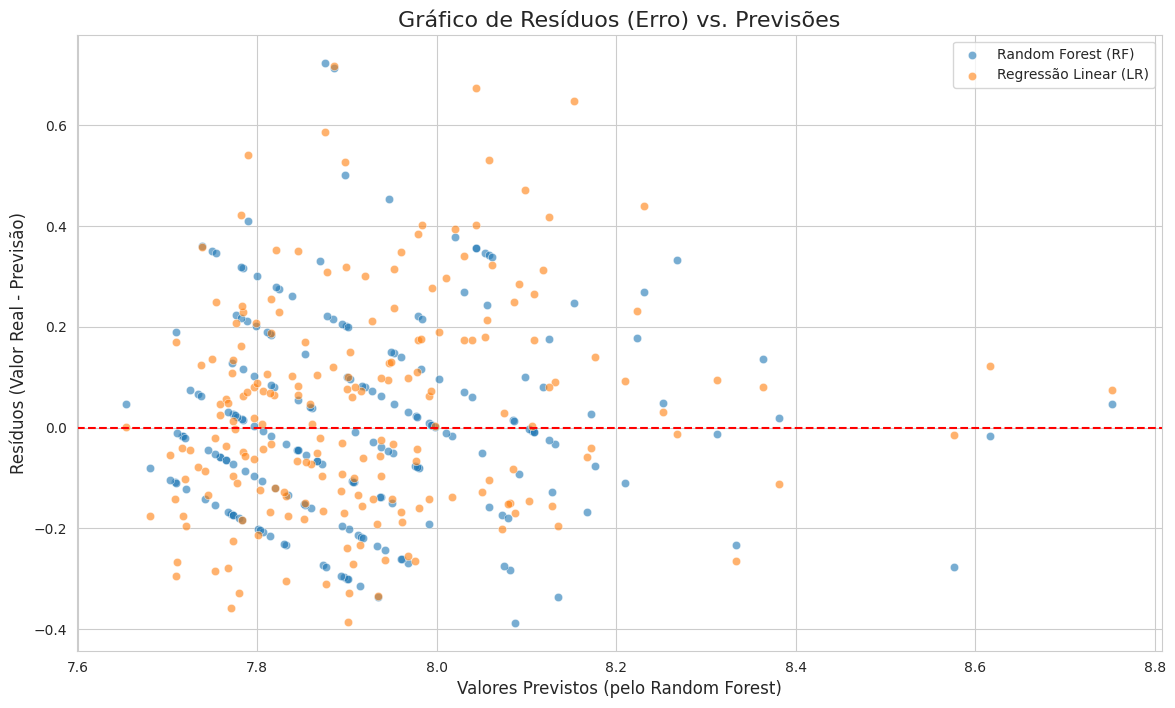

In [48]:
# Gráfico de Resíduos

# Calculando os resíduos (erros) para cada modelo
residuos_linear = y_test - previsoes_linear
residuos_rf = y_test - previsoes_rf

plt.figure(figsize=(14, 8))

# Plotando os resíduos de ambos os modelos
# Eixo X: Os valores previstos modelo Random Forest
# Eixo Y: Os erros (resíduos)
sns.scatterplot(x=previsoes_rf, y=residuos_rf, alpha=0.6, label='Random Forest (RF)')
sns.scatterplot(x=previsoes_rf, y=residuos_linear, alpha=0.6, label='Regressão Linear (LR)')

# Adicionando uma linha de referência em y=0 (onde o erro é zero)
plt.axhline(0, color='red', linestyle='--')

plt.title('Gráfico de Resíduos (Erro) vs. Previsões', fontsize=16)
plt.xlabel('Valores Previstos (pelo Random Forest)', fontsize=12)
plt.ylabel('Resíduos (Valor Real - Previsão)', fontsize=12)
plt.legend()
plt.grid(True)
plt.show()

# **Conclusão e Interpretação Dos Resultados**
## **Análise Visual dos Modelos**

As duas visualizações em conjunto nos contam uma história clara sobre o desempenho dos modelos.

**No Gráfico Real vs. Previsto:**
- Ambos os modelos conseguem seguir a tendência geral dos dados. No entanto, a nuvem de pontos do **Random Forest (gráfico da direita)** é visivelmente mais compacta e alinhada à linha de referência vermelha. Isso é um forte indicativo visual de que suas previsões são, em média, mais precisas e consistentes, o que justifica o seu RMSE numericamente inferior.

**No Gráfico de Resíduos (Erro):**
- Este gráfico torna a diferença ainda mais evidente. Os resíduos do **Random Forest (pontos azuis)** estão muito mais concentrados em torno da linha de erro zero. Em contraste, a **Regressão Linear (pontos laranjas)** apresenta erros sistematicamente maiores, com muitos pontos espalhados bem acima ou abaixo da linha zero.
- Adicionalmente, ambos os modelos mostram o padrão de que os erros tendem a aumentar para filmes com notas mais altas (a nuvem de pontos se "abre" da esquerda para a direita), indicando que é mais difícil para o modelo prever com precisão no topo da escala.

**Conclusão Final:** As duas visualizações fornecem uma evidência forte e clara de que o **Random Forest é o modelo superior**, tanto em precisão geral (menor dispersão dos erros) quanto em consistência.

## **Previsão para um Novo Filme**
Com o pipeline de Random Forest (pipeline_rf) definido como o melhor modelo, agora vou utilizá-lo para prever a nota IMDB para o filme "The Shawshank Redemption", com as características fornecidas no desafio.


In [54]:
# Previsão para 'The Shawshank Redemption'


# Dados do filme fornecidos pelo desafio
filme_novo = {
    'Series_Title': 'The Shawshank Redemption',
    'Released_Year': '1994',
    'Certificate': 'A',
    'Runtime': 142,
    'Genre': 'Drama',
    'Overview': 'Two imprisoned men bond over a number of years, finding solace and eventual redemption through acts of common decency.',
    'Meta_score': 80.0,
    'Director': 'Frank Darabont',
    'Star1': 'Tim Robbins',
    'Star2': 'Morgan Freeman',
    'Star3': 'Bob Gunton',
    'Star4': 'William Sadler',
    'No_of_Votes': 2343110,
    'Gross': 28341.469
}

# Criando o DataFrame a partir do dicionário
df_para_prever = pd.DataFrame([filme_novo])

# Padronizando os nomes das colunas para lowercase, IGUAL ao dataframe de treino
df_para_prever.columns = [col.lower() for col in df_para_prever.columns]

# Ajustando o nome da coluna 'Genre' para 'main_genre' para compatibilidade com o modelo
df_para_prever['main_genre'] = df_para_prever['genre']

# Fazendo a previsão
# O pipeline vai aplicar todas as transformações necessárias automaticamente
previsao_final = pipeline_rf.predict(df_para_prever)

# 5. Exibindo o resultado
print(f"A nota IMDB prevista pelo modelo é: {previsao_final[0]:.2f}")

A nota IMDB prevista pelo modelo é: 8.77



Utilizando o pipeline final e treinado (pipeline_rf), que demonstrou o melhor desempenho, realizei a previsão para o filme 'The Shawshank Redemption' com as características fornecidas.

**Resultado da Previsão:**

A nota IMDB prevista pelo modelo para "The Shawshank Redemption" foi de **8.77**.

# **Salvando o Modelo Final (.pkl)**


In [55]:
# Salvando o Modelo Final (.pkl)
import pickle

# Definir o nome do arquivo
nome_arquivo_modelo = 'modelo_previsao_imdb.pkl'

# Salvar o pipeline treinado no arquivo
with open(nome_arquivo_modelo, 'wb') as file:
    pickle.dump(pipeline_rf, file)

print(f"Modelo salvo com sucesso no arquivo: '{nome_arquivo_modelo}'")

Modelo salvo com sucesso no arquivo: 'modelo_previsao_imdb.pkl'
